In [6]:
import pandas as pd

df = pd.read_csv("./classification.csv")

# Wenn du ein paar Spalten vorab aus den Daten entfernen
# df = df.drop("Spaltenname", axis = 1)

# Wenn du eine kategorische Variable in mehrere Spalten umwandeln
# möchtest, kannst du das mit folgendem Code tun:
# df = pd.get_dummies(df, columns = ["Spaltenname"])

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [7]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["age", "interest"]].values

# Oder: Die Spalte "success" soll nicht zur Vorhersage verwendet werden:
# X = df.drop("success", axis = 1).values

y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_test_proba = model.predict_proba(X_test)[:, 1]

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

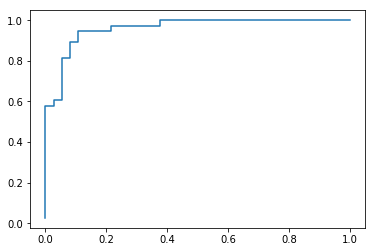

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.show()

In [29]:
roc_auc_score(y_test, y_test_proba)

0.96017069701280233